В этом ноутбуке:
- Загружаем датасет breast_cancer из sklearn
- Обучаем модели из библиотеки (MyLogReg, MyKNNClf)
- Сравниваем с аналогами из scikit-learn
- Считаем метрики качества (Accuracy, Precision, Recall, F1, ROC-AUC)
- Строим графики: матрица ошибок и ROC-кривые

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from my_ml_lib import MyLogReg, MyKNNClf

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Загружаем данные
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

In [6]:
# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Стандартизируем признаки
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [8]:
# Словарь для результатов
results = {}

In [10]:
# MyLogReg
my_lr = MyLogReg(n_iter=2000, learning_rate=0.01, random_state=42)
my_lr.fit(pd.DataFrame(X_train_s), pd.Series(y_train))
y_pred = my_lr.predict(pd.DataFrame(X_test_s))
y_proba = my_lr.predict_proba(pd.DataFrame(X_test_s))
results['MyLogReg'] = {
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred),
    'roc_auc':roc_auc_score(y_test,y_proba)
}

In [12]:
# sklearn LogisticRegression
sk_lr = LogisticRegression(solver='liblinear', max_iter=2000)
sk_lr.fit(X_train_s,y_train)
y_pred = sk_lr.predict(X_test_s)
y_proba = sk_lr.predict_proba(X_test_s)
results['sklearn.LogisticRegression'] = {
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred),
    'roc_auc':roc_auc_score(y_test,y_proba[:,1])
}

In [14]:
# MyKNNClf
my_knn = MyKNNClf(k=5, metric='euclidean')
my_knn.fit(pd.DataFrame(X_train_s), pd.Series(y_train))
y_pred = my_knn.predict(pd.DataFrame(X_test_s))
results['MyKNNClf(k=5)'] = {
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred),
    'roc_auc':None
}

In [16]:
# sklearn KNN
sk_knn = KNeighborsClassifier(n_neighbors=5)
sk_knn.fit(X_train_s,y_train)
y_pred = sk_knn.predict(X_test_s)
results['sklearn.KNeighborsClassifier(k=5)'] = {
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred),
    'roc_auc':None
}

In [18]:
# Выводим таблицу с результатами
results_df = pd.DataFrame(results).T
print("Сравнение моделей:")
print(results_df.round(4))

Сравнение моделей:
                                   accuracy  precision  recall      f1  \
MyLogReg                              0.986     0.9889  0.9889  0.9889   
sklearn.LogisticRegression            0.986     0.9889  0.9889  0.9889   
MyKNNClf(k=5)                         0.979     0.9677  1.0000  0.9836   
sklearn.KNeighborsClassifier(k=5)     0.979     0.9677  1.0000  0.9836   

                                   roc_auc  
MyLogReg                            0.9969  
sklearn.LogisticRegression          0.9977  
MyKNNClf(k=5)                          NaN  
sklearn.KNeighborsClassifier(k=5)      NaN  


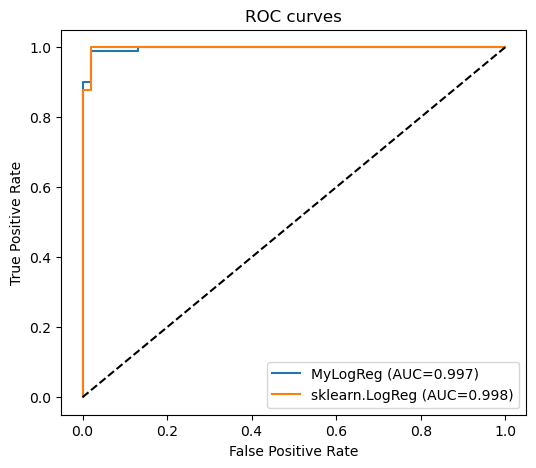

In [20]:
plt.figure(figsize=(6,5))
for name, clf in [('MyLogReg', my_lr), ('sklearn.LogReg', sk_lr)]:
    if hasattr(clf,"predict_proba"):
        if name=="MyLogReg":
            proba = my_lr.predict_proba(pd.DataFrame(X_test_s))
        else:
            proba = sk_lr.predict_proba(X_test_s)[:,1]
        fpr,tpr,_ = roc_curve(y_test,proba)
        plt.plot(fpr,tpr,label=f"{name} (AUC={auc(fpr,tpr):.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend()
plt.show()